In [1]:
from astropy.io.fits import getdata, getheader
import astropy.units as u
from nustar_lunar_pointing.tracking import get_epoch_tle
from nustar_lunar_pointing.tracking import convert_nustar_time
from nustar_lunar_pointing.tracking import get_moon_j2000

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
tlefile = '../data/NUSTAR.tle'
att = getdata('../data/nu60160109002A.attorb')
hdr = getheader('../data/nu60160109002A.attorb', 1)
mjdref = hdr['MJDREFI']

checktime = convert_nustar_time(att[0]['TIME'])
mindt, line1, line2 = get_epoch_tle(checktime, tlefile)

In [5]:
from astropy.coordinates import SkyCoord
doff = []
dra = []
ddec =[]
dt = []

base_ra = None
base_dec = None

tcheck = min(att['Time'])
step_size = 20. 
for ind, t0 in enumerate(att['Time']):
    if (t0 - tcheck) < step_size:
        continue
    else:
        tcheck = t0

    if (t0 - min(att['Time'])) > 3000:
        break

        
    t1 = convert_nustar_time(t0)
    
    ra_moon, dec_moon = get_moon_j2000(t1, line1, line2)
    moon_skycoord = SkyCoord(ra_moon, dec_moon)

    if base_ra is None:
        base_ra = ra_moon
        base_dec = dec_moon
        base_skycoord = moon_skycoord
        base_time = min(att['Time'])
    else:
        this_skycoord = SkyCoord(ra_moon, dec_moon)
        doff.extend([this_skycoord.separation(base_skycoord).arcsec])
        dra.extend([
            (ra_moon - base_ra).to(u.arcsec).value
        ])
        ddec.extend([
            (dec_moon - base_dec).to(u.arcsec).value
        ])
        dt.extend([t0 - base_time])
        


0.03831759610361909
0.038997426968601874
0.037721266867862674
0.041707546368796124
0.04233815984114701
0.04343649369448319
0.042371988403955216
0.045525334310381
0.046564790020186424
0.04529345441300848
0.04852918139127032
0.04950017714010992
0.04752691822153954
0.051818634769811446
0.05221719610170254
0.05308392247751612
0.05133577974888055
0.054693387486374166
0.05547392275316478
0.05352999284797098
0.05690896915744266
0.05759707818188948
0.05496315974508226
0.05934816366785412
0.05943733721860705
0.05662236294687375
0.0609941233317132
0.06098023831791408
0.06143330574985043
0.058896330274008805
0.062214146209504974
0.06256013213191314
0.05986929944173672
0.06312951336223781
0.0633659875965975
0.06002917419599081
0.06422371981399881
0.06384386677618825
0.06393056028852356
0.060931882292035194
0.06398937127111254
0.06396307054916482
0.06085748607102763
0.06380069650107355
0.06366082358402801
0.059959053453663196
0.06378233065720186
0.06302441959741183
0.05924849112093246
0.06292610488

IndexError: list index out of range

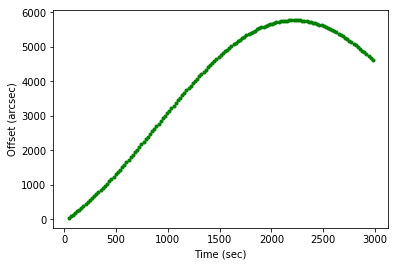

In [18]:
plt.plot(dt, doff, 'g.')
plt.xlabel('Time (sec)')
plt.ylabel('Offset (arcsec)')

for ind, last in enumerate(doff):
    print( (doff[ind+1] - last)/(60 * 20.))
    if ind > 300:
        break

In [ ]:
from astropy.coordinates import SkyCoord
doff = []
dra = []
ddec =[]
dt = []

base_ra = None
base_dec = None

tcheck = min(att['Time'])
step_size = 1. # arcminute
last_skycoord = None
last_time = None

set = 0
for ind, t0 in enumerate(att['Time']):

    if (t0 - min(att['Time'])) < 1500:
        continue


    if (t0 - min(att['Time'])) > 1800:
        break

        
    t1 = convert_nustar_time(t0)
    
    ra_moon, dec_moon = get_moon_j2000(t1, line1, line2)
    moon_skycoord = SkyCoord(ra_moon, dec_moon)

    if set == 0:
        print(t1)
        
        if last_time is not None:
            print(t0 - last_time)
        
        last_time = t0
        last_skycoord = moon_skycoord


        set = 1
    else:
        if moon_skycoord.separation(last_skycoord).arcmin > step_size:
            set=0
               
    
    

In [ ]:
dra

In [17]:
200e3 / (10 * 60)

333.3333333333333